Learnt from :
1. [elitedatascience-seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial)
2. [Data visualization with Seaborn](https://www.oreilly.com/learning/data-visualization-with-seaborn)
3. [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
4. [Better Plotting In Python With Seaborn](https://robinsones.github.io/Better-Plotting-in-Python-with-Seaborn/)
5. [Quick overview of Seaborn](http://www.puzzlr.org/a-quick-overview-of-seaborn/)

In [1]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

We can set the seaborn style as the default matplotlib style by calling `sns.set()` : after doing this, even simple matplotlib
plots will look much better. If not used the default matplotlib style will be used in the plots.  

set figure size by passing dictionary to __rc__ parameter with key `figure.figsize` in seaborn `set` method

In [2]:
sns.set()
sns.set(rc={'figure.figsize':(10,8)}) 

In [3]:
# Loading dataset
df = pd.read_csv('Pokemon.csv', encoding = "ISO-8859-1", index_col = 0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


While working with the above datset got this error : __UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte__ . To fix this , referred this [post in stackoverflow](https://stackoverflow.com/a/18172249). 

>`read_csv` takes an encoding option to deal with files in different formats. I mostly use `read_csv('file', encoding = "ISO-8859-1")`, or alternatively `encoding = utf8` for reading, and generally `utf-8` for `to_csv`. You can also use the alias `latin1` instead of `ISO-8859-1`.

## Plotting a scatterplot

Use the `lmplot()` function.

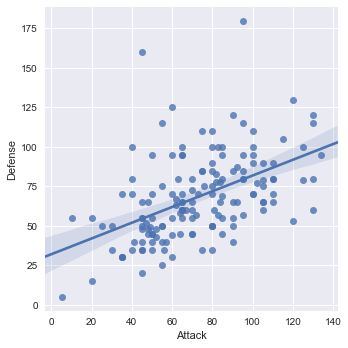

In [4]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df);

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the `lmplot()`:

- First, we'll set `fit_reg=False` to remove the regression line, since we only want a scatter plot.
- Then, we'll set` hue='Stage'` to color our points by the Pokémon's evolution stage. 

This __hue__ argument is very useful because it allows you to express a third dimension of information using color.

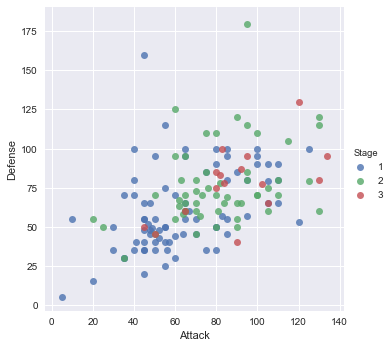

In [5]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage');   # Color by evolution stage

Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you _most_ of the way there, but you'll sometimes need to bring in Matplotlib.

## To set axes limits
1. First, invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib's customization functions. In this case, we'll use its `plt.ylim()` and `plt.xlim()` functions.

Eg : 

```
# Customizing with MatplotlibPython
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
```

For more information on Matplotlib's customization functions, check out its [documentation](https://matplotlib.org/users/pyplot_tutorial.html).

### The role of Pandas.
Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted (that's where Pandas comes up).

## Boxplot

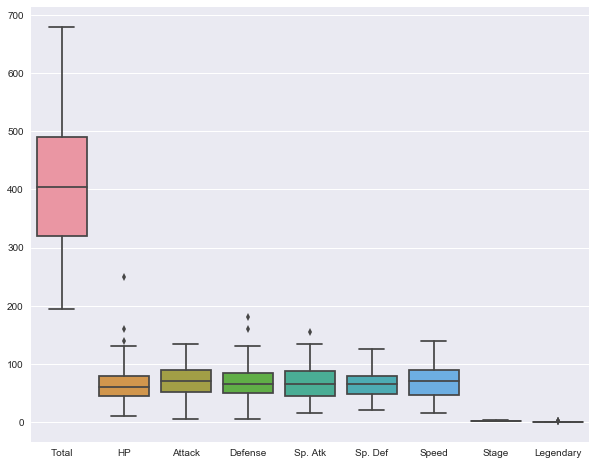

In [6]:
sns.boxplot(data = df);

some columns we'd probably like to remove:

- We can remove the Total since we have individual stats.
- We can remove the Stage and Legendary columns because they aren't combat stats

Let's create a new DataFrame called `stats_df` that only keeps the stats columns:

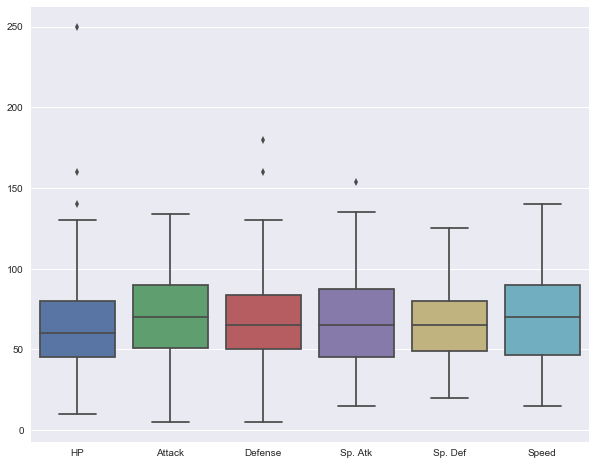

In [7]:
# Dropping columns
stats_df = df.drop(['Total','Stage','Legendary'], axis = 1)

# New boxplot made using stats_df
sns.boxplot(data = stats_df);

## Seaborn Themes
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

We can change the theme using `sns.set_style()`. It takes one of five arguments: `white`, `dark`, `whitegrid`, `darkgrid`, and `ticks`.These are the five options for the background of your plot; the default one is darkgrid. 

Next, we'll change the theme to 'whitegrid' while making a violin plot.

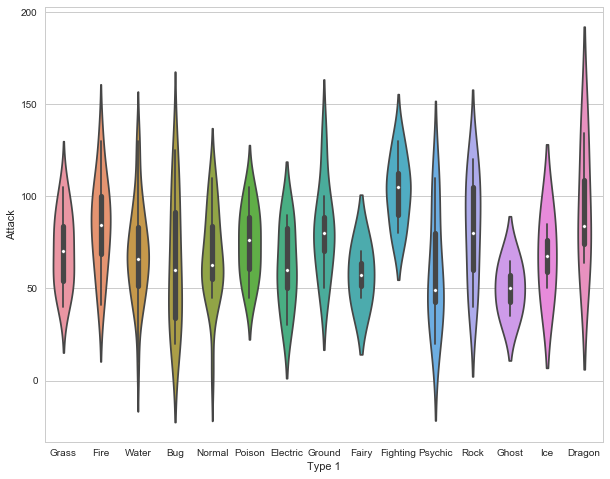

In [8]:
# set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df);

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

## Color palettes.

Seaborn allows us to set custom color palettes. We can simply create an ordered __Python list__ of color hex values.

Using [wikipedia web colors](https://en.wikipedia.org/wiki/Web_colors) to help us create a new color palette:

In [9]:
pokemon_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

 Now we can simply use the `palette=` argument to recolor our chart.

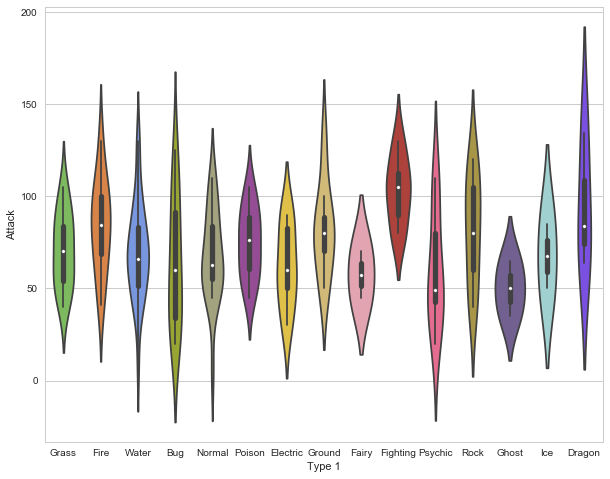

In [10]:
# Violin plot with Pokemon color palette
sns.violinplot(x = 'Type 1', y = 'Attack', data = df,
              palette = pokemon_type_colors); # Set color palette

## Adjusting height and width of figure obtained using seaborn

to scale the figure use : `plt.figure(figsize=(width, height))`

You can also set figure size by passing dictionary to __rc__ parameter with key `figure.figsize` in seaborn `set` method:

```
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
```
Also [Refer](https://stackoverflow.com/a/47955814).

## To save the figure use :


`plt.figsize("Output_file_name.png", dpi = 400)`

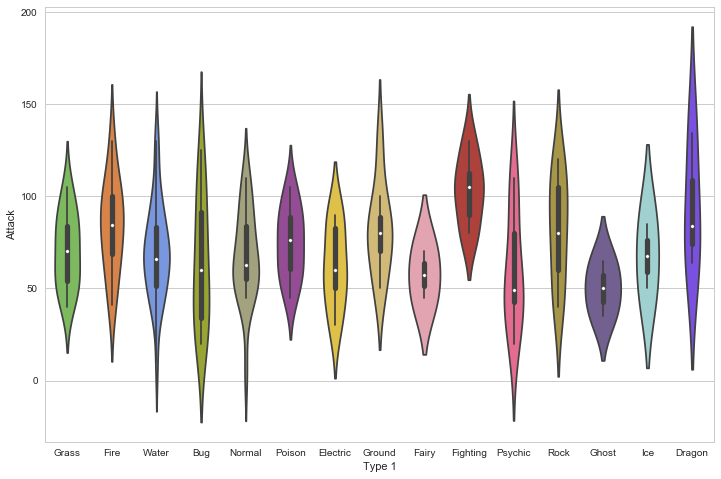

In [11]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = 'Type 1', y = 'Attack', data = df, palette = pokemon_type_colors);
plt.savefig("Palette_tutorial.png", dpi=300)

In [12]:

new_colors = ['#228B22',  # Grass
                    '#FF8C00',  # Fire
                    '#00FFFF',  # Water
                    '#DAA520',  # Bug
                    '#FAEBD7',  # Normal
                    '#8B0000',  # Poison
                    '#FFFF00',  # Electric
                    '#8B4513',  # Ground
                    '#FFE4E1',  # Fairy
                    '#2F4F4F',  # Fighting
                    '#FF00FF',  # Psychic
                    '#B22222',  # Rock
                    '#808080',  # Ghost
                    '#B0E0E6',  # Ice
                    '#FFA500',  # Dragon
                   ]

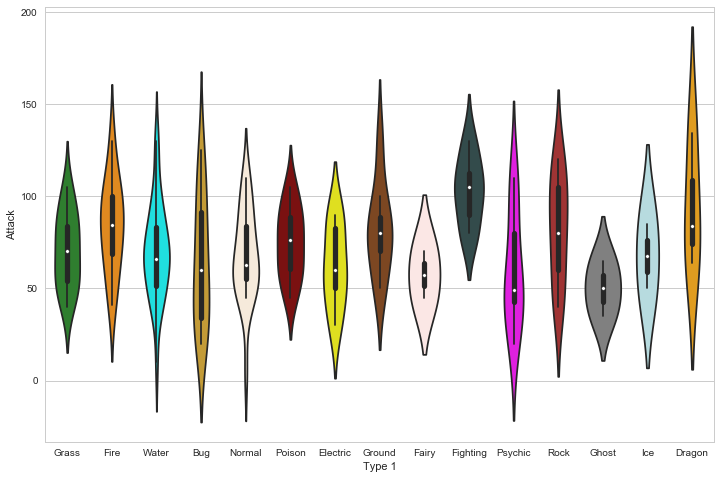

In [13]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = 'Type 1', y = 'Attack', data = df, palette = new_colors);
plt.savefig("Palette_mine.png", dpi=300)

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

In [14]:
sns.set_style('darkgrid')

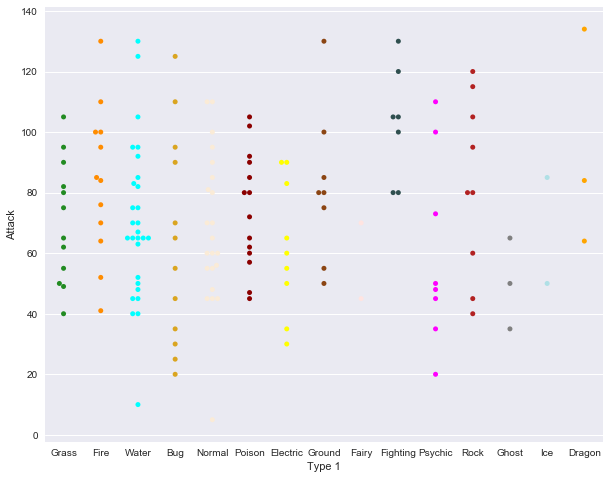

In [15]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, palette = new_colors);

Combining swarm plot and the violin plot. After all, they display similar information.

## Overlaying Plots

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

1. First, we'll make our figure larger using Matplotlib.
2. Then, we'll plot the violin plot. However, we'll set `inner = None` to remove the bars inside the violins.
3. Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
4. Finally, we'll set a title using Matplotlib.

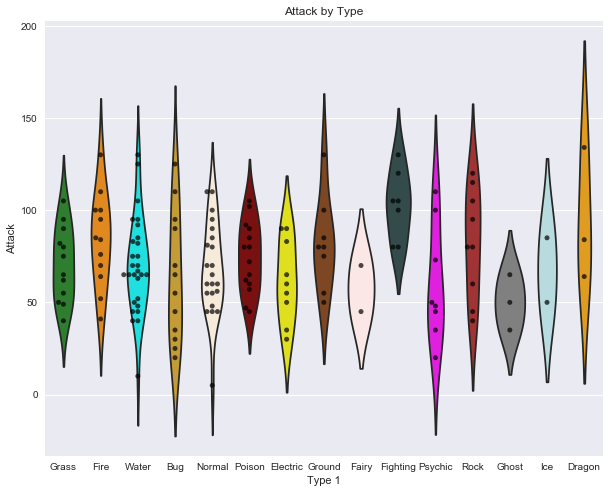

In [16]:
# Create plot
sns.violinplot(x='Type 1',
              y='Attack',
              data=df,
              inner=None,  # Remove the bars
              palette=new_colors);

sns.swarmplot(x='Type 1',
             y='Attack',
             data = df,
             color='k', # Make points black
             alpha=0.7); # Make points slightly transparent

# Set title with matplotlib
plt.title('Attack by Type');

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

## Putting it all together

 we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some __data wrangling__ with Pandas beforehand.
 
First, here's a reminder of our data format:

In [17]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [18]:
stats_df.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')

As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's `melt()` function. It takes 3 arguments:

- First, the DataFrame to melt.
- Second, ID variables to keep (Pandas will melt all of the other ones).
- Finally, a name for the new, melted variable.

In [19]:
melted_df = pd.melt(stats_df,
                   id_vars = ["Name", "Type 1", "Type 2"], # Variable to keep
                   var_name = "Stat") # Name of melted variable

melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [20]:
melted_df.tail()

,Name,Type 1,Type 2,Stat,value
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130
905,Mew,Psychic,NaN,Speed,100


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...

In [21]:
print(stats_df.shape)

(151, 9)


In [22]:
print(melted_df.shape)

(906, 5)


...you'll find that `melted_df` has 6 times the number of rows as `stats_df`.

Now we can make a swarm plot with `melted_df`.

But this time, we're going to set `x='Stat'` and `y='value'` so our swarms are separated by stat.
Then, we'll set `hue='Type 1'` to color our points by the Pokémon type.

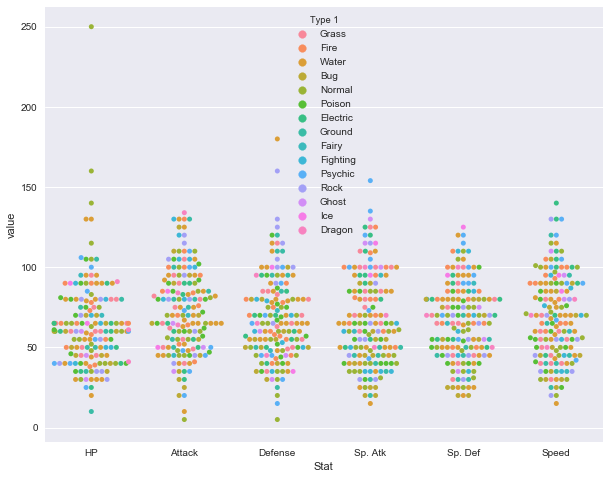

In [23]:
# swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue = 'Type 1');

## Making the above graph more readable:

1. Giving limits to the y-axis `plt.ylim(0,200)`
2. Separate points by hue using the argument `dodge=True`.
3. Use our custom Pokemon color palette : `new_colors`.
4. Place the legend to the right. [Matplotlib legend](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend)

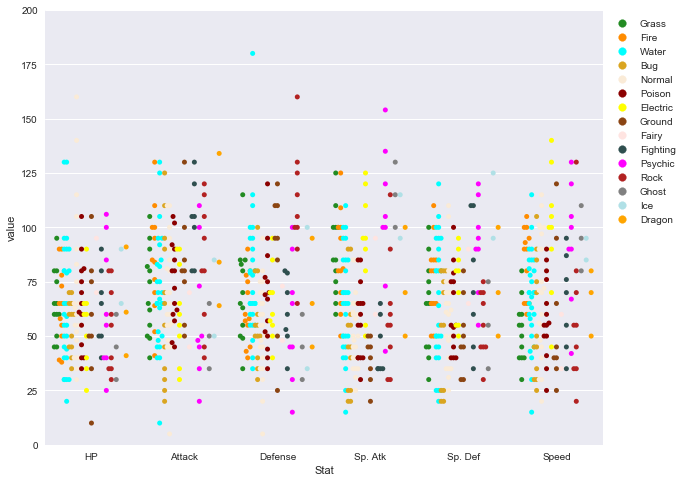

In [24]:
# swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue = 'Type 1',
             dodge = True,  # Separate points by hue
             palette=new_colors);
plt.ylim(0,200);
plt.legend(bbox_to_anchor=(1,1), loc = 0);

## Heatmap
Heatmaps help you visualize matrix-like data.

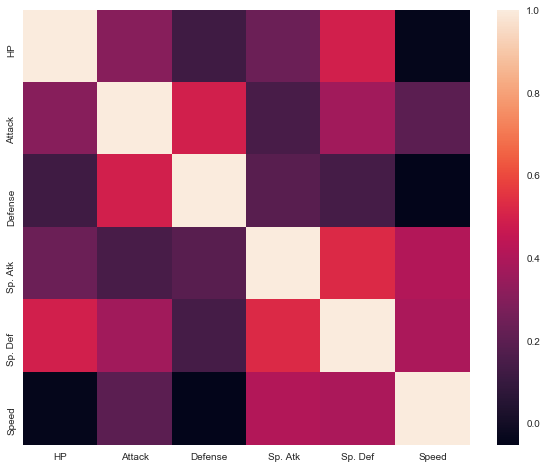

In [25]:
# Calculate correlations
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr);

## Histogram
Histograms allow you to plot the distributions of numeric variables.  

For histogram use : `sns.distplot()`

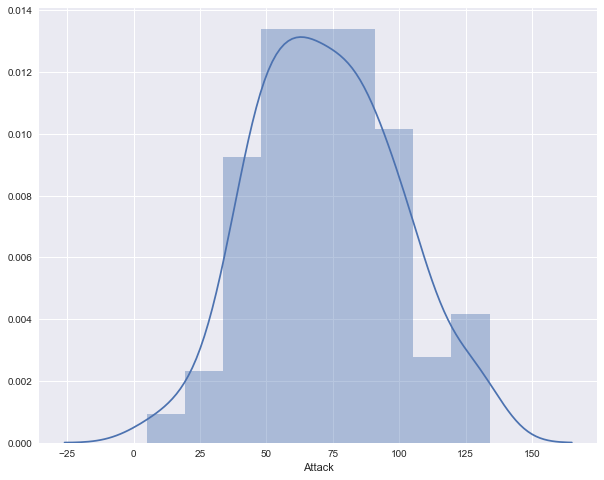

In [26]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack);

## Bar Plot
Bar plots help you visualize the distributions of categorical variables.  

Seaborn will automatically count.


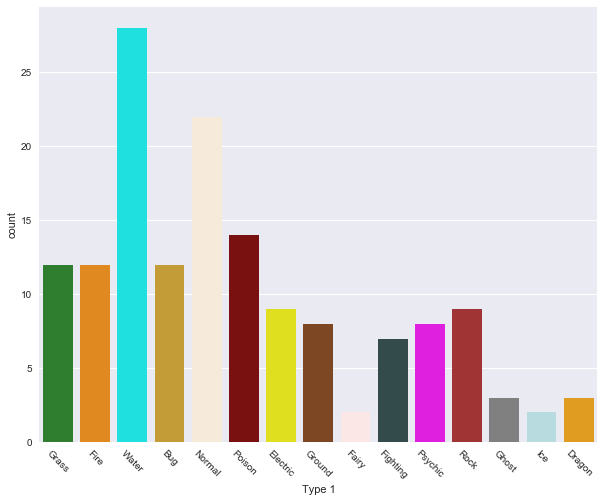

In [27]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data = df, palette = new_colors);

# Rotate x-labels
plt.xticks(rotation=-45);

Observe the __font size of xlabel and ylabel are very small__ and __some columns are not visible due to different background.__

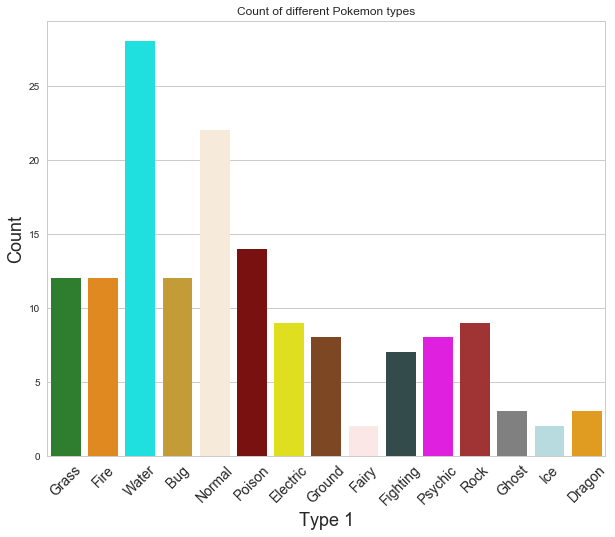

In [28]:
# Change the backgriund
sns.set_style('whitegrid')

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data = df, palette = new_colors);

# Rotate x-labels
plt.xticks(rotation=45,fontsize = 14);

# Change fontsize
plt.xlabel('Type 1', fontsize = 18);
plt.ylabel('Count', fontsize = 18);
plt.title('Count of different Pokemon types');

## Factor Plot
Factor plots make it easy to separate plots by categorical classes.  
`sns.factorplot(x = '', y = '', data = df, hue = '', col = '', kind = 'desired_plot')`

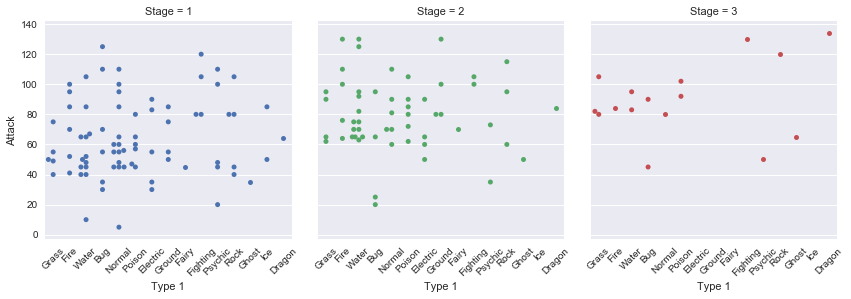

In [29]:
# Set background
sns.set_style('darkgrid')

# Factor plot
g = sns.factorplot(x='Type 1',
                  y='Attack',
                  data=df,
                  hue='Stage', # COlor by stage
                  col='Stage', # Seperate by stage
                  kind='swarm'); # Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation=45);

# Rotate
# plt.xticks(rotation = 45);

## Density Plot
Density plots display the distribution between two variables.

#### Tip: Consider overlaying this with a scatter plot.

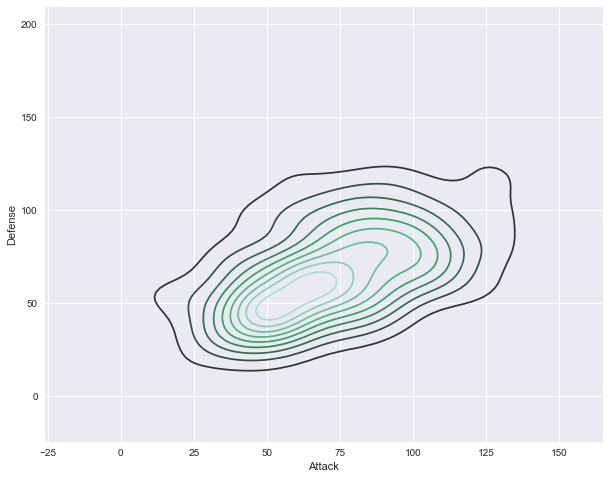

In [30]:
# Density plot
sns.kdeplot(df.Attack, df.Defense);

Overlaying the above plot with scatterplot

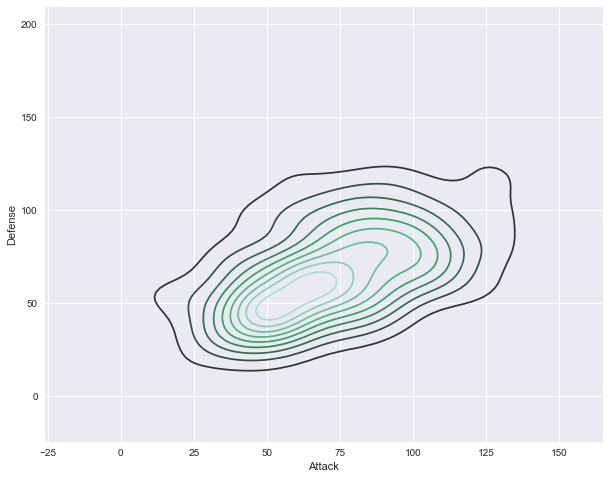

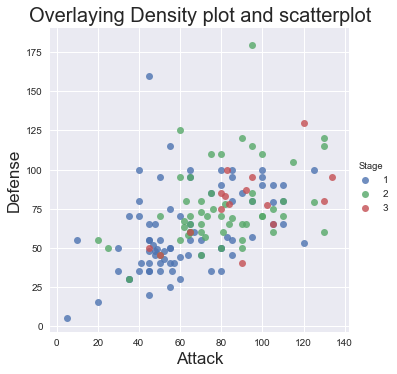

In [31]:
# Density plot
sns.kdeplot(df.Attack, df.Defense);

# Scatterplot
sns.lmplot(x='Attack', y='Defense',data=df, scatter= True, fit_reg=False, hue = 'Stage');

plt.title('Overlaying Density plot and scatterplot', fontsize = 20);
plt.xlabel('Attack', fontsize = 17);
plt.ylabel('Defense', fontsize = 17);


# Problem in overlaying: To overlay the above 2 graphs

# To study

- [Axis grids seaborn documentation](https://seaborn.pydata.org/tutorial/axis_grids.html)
- []()

## Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.  

By default it is a scatterplot.

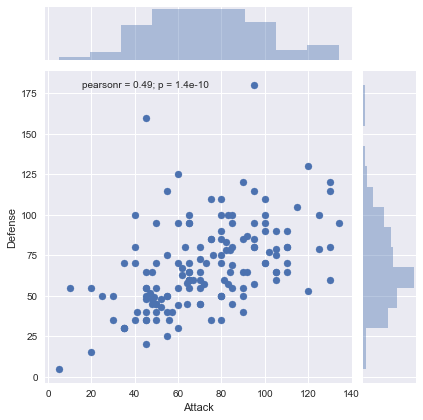

In [32]:
sns.jointplot(x='Attack', y='Defense', data=df);

We can see the joint distribution and the marginal distributions together using `sns.jointplot`. For this plot, we'll set the style to a white background:

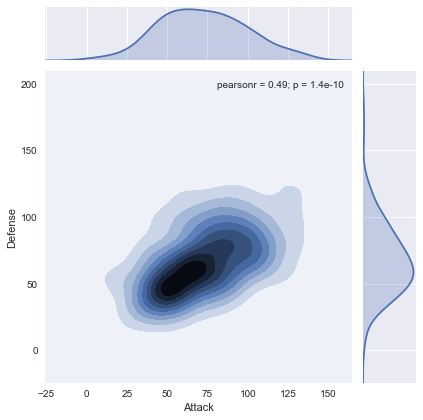

In [33]:
sns.jointplot(x='Attack', y='Defense', data=df, kind='kde');

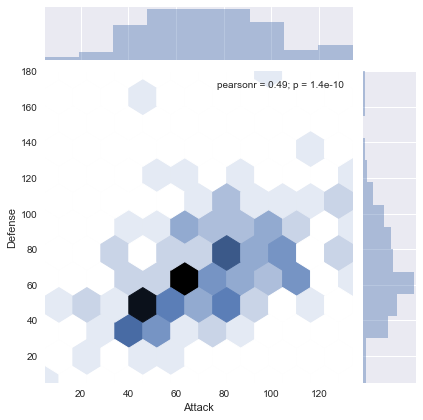

In [34]:
sns.jointplot(x='Attack', y='Defense', data=df, kind='hex');